# Student Performance Analysis

### <b>Introduction</b>

- <b>Objective</b>

  This project performs an exploratory data analysis (EDA) of student academic performance using Python’s data science ecosystem. The primary goal is to extract meaningful insights from examination score data by identifying patterns, variations, and relationships that influence student outcomes.

  The analysis focuses on transforming raw educational data into interpretable information through statistical techniques and visualizations.

- <b>Key objectives include:</b>

  - Assess overall student performance across core subjects (Math, Reading, Writing)

  - Analyze score distributions to detect trends, variability, and potential outliers

  - Compare subject-wise performance to identify strengths and weaknesses

  - Investigate performance disparities across demographic and socio-academic factors:

      - Gender

      - Parental level of education

      - Lunch type

      - Test preparation course

      - Race/Ethnicity

  - Examine inter-subject relationships using correlation analysis

  - Generate visual insights through histograms, bar charts, and heatmaps

  - By combining statistical summaries with data visualization, this project aims to uncover hidden structures in student performance data and support data-driven academic interpretation.

### <b>Dataset Overview</b>

- The dataset contains information about the marks secured by 1000 students in three subjects: Math, Reading, and Writing. The key features include:

  - Gender: Student's gender (female, male).
  - Race/Ethnicity: The group the student belongs to (group A, group B, etc.).
  - Parental Level of Education: The highest level of education attained by the student's parents.
  - Lunch: Type of lunch the student receives (standard, free/reduced).
  - Test Preparation Course: Whether the student completed a test preparation course (none, completed).
  - Scores: The marks the student obtained in Math, Reading, and Writing.

### Data Loading & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

#### Dataset Overview

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Data Preparation

In [7]:
df.isnull().sum() # No missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum() # No duplication in data

np.int64(0)

In [9]:
df.select_dtypes(include='object').columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [10]:
for col in df.select_dtypes(include='object'):
  print(col)
  print(df[col].unique())
  print('-'*50)

gender
['female' 'male']
--------------------------------------------------
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
lunch
['standard' 'free/reduced']
--------------------------------------------------
test preparation course
['none' 'completed']
--------------------------------------------------


In [11]:
df.select_dtypes(include='object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [12]:
# No duplicates and null values were found and datatypes are appropriate

### Feature Engineering

In [13]:
df = df.rename(columns={
    'math score': 'math',
    'reading score': 'reading',
    'writing score': 'writing'
})
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math', 'reading', 'writing'],
      dtype='object')

In [14]:
df['total_score'] = df['math'] + df['reading'] + df['writing']

In [15]:
df["avg_score"] = df['total_score']/3

In [16]:
def performance(avg):
  if avg >= 85:
      return "Excellent"
  elif avg >= 70:
      return "Good"
  elif avg >= 50:
      return "Average"
  else:
      return "Needs Improvement"

df["performance"] = df["avg_score"].apply(performance)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing,total_score,avg_score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Good
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Good
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Needs Improvement
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Good


### Exploratory Data Analysis (EDA)

#### Academic Performance Trends

#### Which subject has the highest average score?

In [18]:
df[['math', 'reading', 'writing']].mean().sort_values(ascending=False)

reading    69.169
writing    68.054
math       66.089
dtype: float64

Reading and writing scores are higher on average than math. So math may be comparatively more challenging for students in this dataset.

#### Distribution of scores

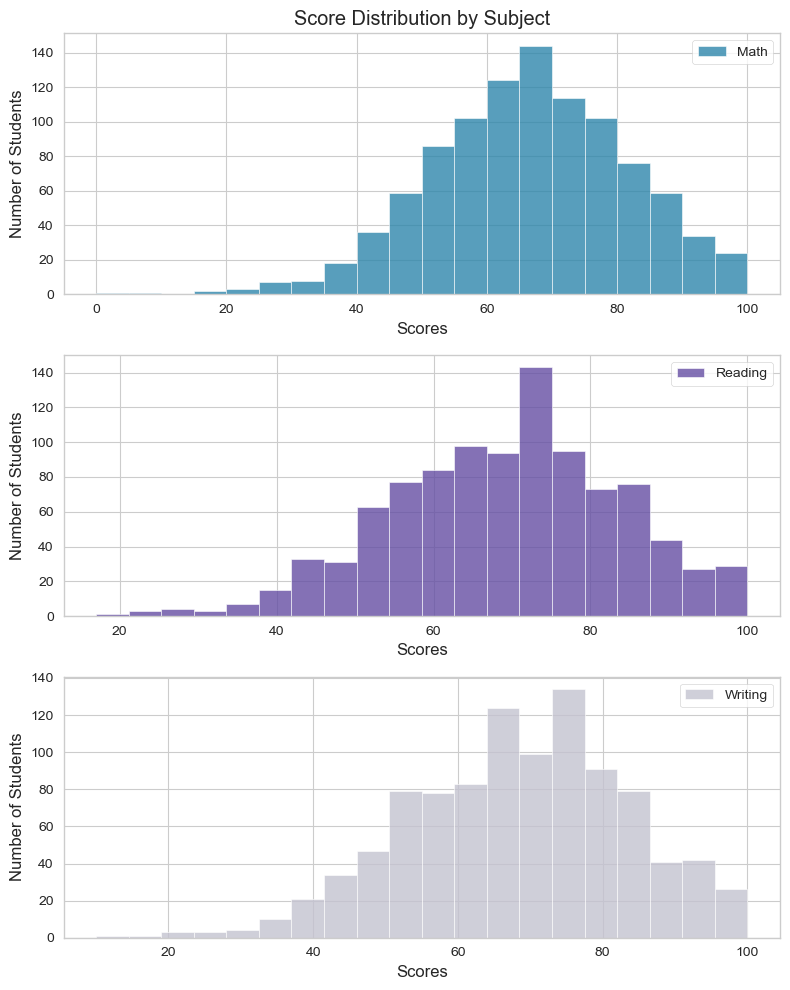

In [43]:
plt.figure(figsize=(8,10))

# Math
plt.subplot(3,1,1)
plt.hist(df["math"], bins=20, alpha=0.8, label="Math", color="#2E86AB")
plt.title('Score Distribution by Subject')
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.legend()

# Reading
plt.subplot(3,1,2)
plt.hist(df['reading'], bins=20, alpha=0.8, label='Reading', color='#654EA3')
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.legend()

# Writing
plt.subplot(3,1,3)
plt.hist(df['writing'], bins=20, alpha=0.8, label='Writing', color='#C4C3D0')
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.legend()

plt.savefig('images/score_distribution.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


📝 Observation:

  - Math scores show a wider spread compared to other subjects
  - Reading and Writing scores cluster more around higher values
  - Fewer extremely low scores appear in Reading/Writing

🧠 Inference:

  - Students exhibit greater variability in Math performance

  - Reading and Writing appear to be relative strengths

  - Math may be perceived as more challenging

#### Overall Performance

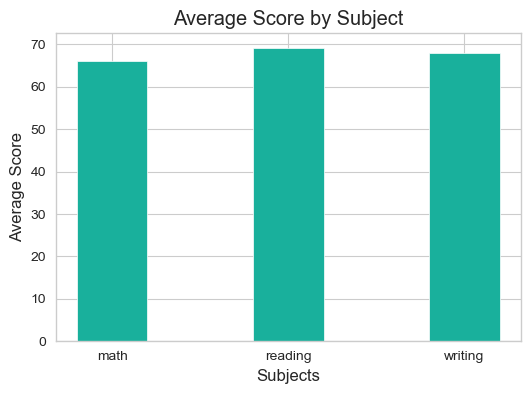

In [51]:
subject_means = df[['math', 'reading', 'writing']].mean()

plt.figure(figsize=(6,4))

plt.bar(subject_means.index, subject_means.values, color='#19b09c', width=0.4)

plt.title('Average Score by Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Score')

plt.savefig('images/avg_subject.png', dpi=300, bbox_inches='tight')
plt.show()


The majority of students fall within the mid-score range, indicating moderate academic performance across the dataset with relatively few extreme high or low performers.

#### Which gender scores higher on average?

In [21]:
x = df.groupby('gender')[['math', 'reading', 'writing', 'avg_score']].mean()

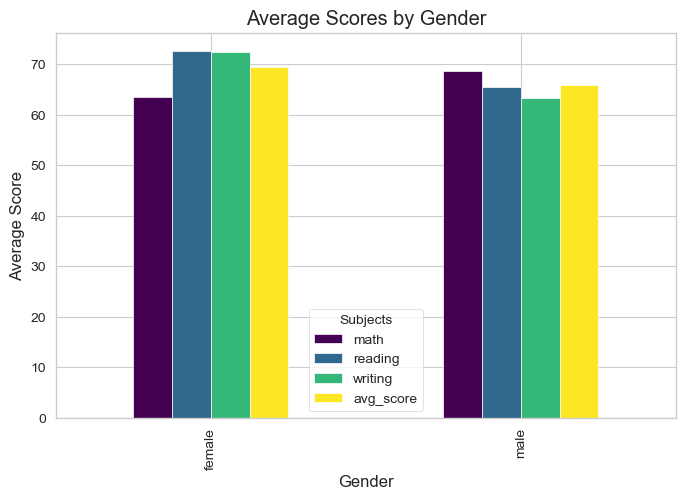

In [37]:
x.plot(kind='bar', figsize=(8,5), cmap='viridis')

plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.legend(title="Subjects")

plt.savefig('images/gender_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

📝 Observation:

  - Female students score higher in Reading and Writing

  - Math scores between genders are closer

  - Differences are noticeable but not extreme

🧠 Inference:

  - Gender-related performance trends exist

  - Language subjects favor female students in this dataset

  - cademic gaps are moderate rather than drastic

#### Student Performance Insights

In [ ]:
# Top 10 students

df.sort_values(by='avg_score', ascending=False).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing,total_score,avg_score,performance
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,Excellent
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Excellent
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,Excellent
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,Excellent
712,female,group D,some college,standard,none,98,100,99,297,99.000000,Excellent
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,Excellent
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,Excellent
625,male,group D,some college,standard,completed,100,97,99,296,98.666667,Excellent
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667,Excellent
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,Excellent


In [24]:
# Last 10 students

df.sort_values(by='avg_score').head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing,total_score,avg_score,performance
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000,Needs Improvement
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333,Needs Improvement
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000,Needs Improvement
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333,Needs Improvement
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000,Needs Improvement
76,male,group E,some high school,standard,none,30,26,22,78,26.000000,Needs Improvement
601,female,group C,high school,standard,none,29,29,30,88,29.333333,Needs Improvement
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667,Needs Improvement
787,female,group B,some college,standard,none,19,38,32,89,29.666667,Needs Improvement
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000,Needs Improvement


In [25]:
# Consistent Students

df[df[['math', 'reading', 'writing']].min(axis=1) > 80]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing,total_score,avg_score,performance
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent
6,female,group B,some college,standard,completed,88,95,92,275,91.666667,Excellent
16,male,group C,high school,standard,none,88,89,86,263,87.666667,Excellent
34,male,group E,some college,standard,none,97,87,82,266,88.666667,Excellent
49,male,group C,high school,standard,completed,82,84,82,248,82.666667,Good
...,...,...,...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100,292,97.333333,Excellent
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Excellent
970,female,group D,bachelor's degree,standard,none,89,100,100,289,96.333333,Excellent
979,female,group C,associate's degree,standard,none,91,95,94,280,93.333333,Excellent


A subset of students demonstrates consistently high performance across all subjects, reflecting balanced academic strength rather than subject-specific excellence.

#### Factors Influencing Performance

#### Test Preparation Effect

In [26]:
df.groupby("test preparation course").median(numeric_only=True)

,math,reading,writing,total_score,avg_score
test preparation course,,,,,
completed,69.0,75.0,76.0,220.5,73.500000
none,64.0,67.0,65.0,196.0,65.333333


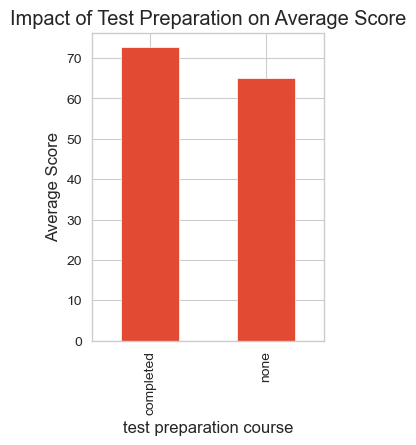

In [38]:
df.groupby("test preparation course")["avg_score"].mean().plot(kind="bar",figsize=(3,4))

plt.title("Impact of Test Preparation on Average Score")
plt.ylabel("Average Score")

plt.savefig('images/test_prep_impact.png', dpi=300, bbox_inches='tight')
plt.show()


Students who completed the test preparation course scored noticeably higher on average, suggesting that structured preparation plays a significant role in academic success.

#### Parental Educational Influence

In [28]:
df.groupby("parental level of education").median(numeric_only=True)

,math,reading,writing,total_score,avg_score
parental level of education,,,,,
associate's degree,67.0,72.5,70.5,209.0,69.666667
bachelor's degree,68.0,73.0,74.0,213.5,71.166667
high school,63.0,66.0,64.0,195.0,65.000000
master's degree,73.0,76.0,75.0,220.0,73.333333
some college,67.5,70.5,70.0,206.0,68.666667
some high school,65.0,67.0,66.0,200.0,66.666667


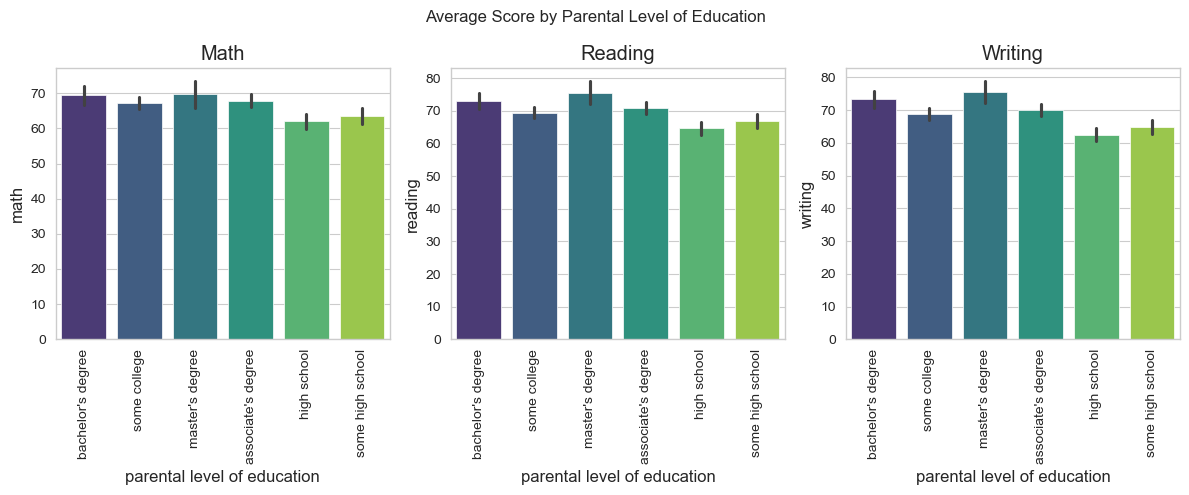

In [39]:
plt.figure(figsize=(12, 5))
common_palette = "viridis"

plt.subplot(1, 3, 1)
sns.barplot(
    x='parental level of education',
    y='math',
    data=df,
    hue='parental level of education',
    palette=common_palette,
    legend=False
)
plt.title('Math')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(
    x='parental level of education',
    y='reading',
    data=df,
    hue='parental level of education',
    palette=common_palette,
    legend=False
)
plt.title('Reading')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(
    x='parental level of education',
    y='writing',
    data=df,
    hue='parental level of education',
    palette=common_palette,
    legend=False
)
plt.title('Writing')
plt.xticks(rotation=90)

plt.suptitle('Average Score by Parental Level of Education')

plt.savefig('images/parental_level_education.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


Higher parental education levels are generally associated with improved student performance, highlighting the potential influence of academic support environments at home.

📝 Observation:

  - Students with highly educated parents tend to score higher

  - Performance improves with increasing parental education level

  - Lower parental education linked with slightly lower scores

🧠 Inference:

  - Home academic environment affects student outcomes

  - Educated parents may provide better learning support

  - Educational exposure impacts performance

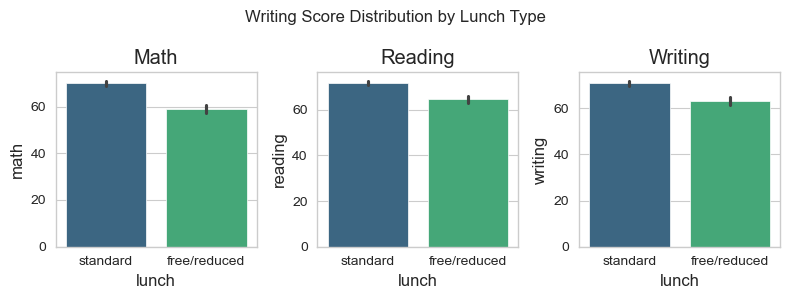

In [41]:
plt.figure(figsize=(8,3))

plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math', data=df,hue='lunch', palette='viridis')
plt.title('Math')

plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading', data=df,hue='lunch', palette='viridis')
plt.title('Reading')

plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing', data=df,hue='lunch', palette='viridis')
plt.title('Writing')

plt.suptitle('Writing Score Distribution by Lunch Type')

plt.tight_layout()
plt.show()

📝 Observation:

  - Students with standard lunch achieve higher scores

  - Reduced lunch students show lower averages

  - Differences appear across all subjects

🧠 Inference:

  - Socio-economic factors may influence academic success

  - Nutrition/access resources correlate with performance

  - External living conditions affect learning

#### Ethnicity Analysis

#### Distribution of students

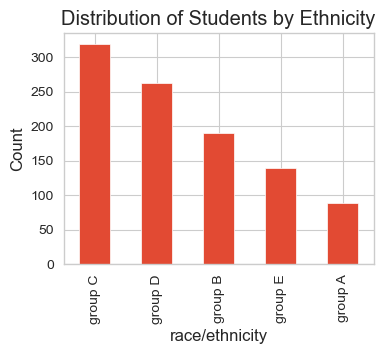

In [31]:
df["race/ethnicity"].value_counts().plot(kind="bar",figsize=(4,3))

plt.title("Distribution of Students by Ethnicity")
plt.ylabel("Count")
plt.show()

📝 Observation:

  - Students are unevenly distributed among ethnicity groups

  - Some groups have higher representation

  - No single group dominates entirely

🧠 Inference:

  - Dataset reflects demographic diversity

  - Representation imbalance may affect aggregate trends

  - Group comparisons should consider sample sizes

#### Performance By Ethinicity

In [32]:
df.groupby('race/ethnicity').median(numeric_only=True)

,math,reading,writing,total_score,avg_score
race/ethnicity,,,,,
group A,61.0,64.0,62.0,184.0,61.333333
group B,63.0,67.0,67.0,195.0,65.000000
group C,65.0,71.0,68.0,205.0,68.333333
group D,69.0,71.0,72.0,210.0,70.000000
group E,74.5,74.0,72.0,220.5,73.500000


<Axes: xlabel='race/ethnicity'>

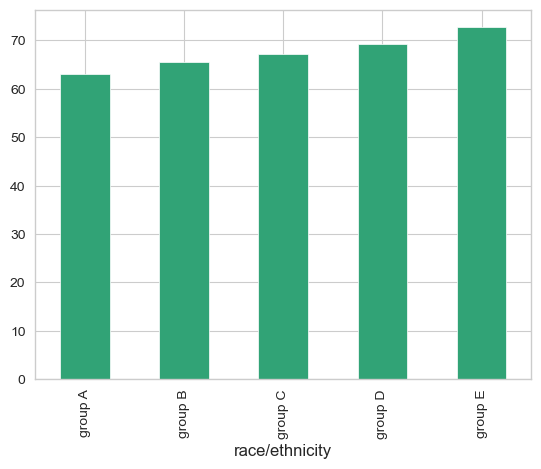

In [33]:
df.groupby('race/ethnicity')['avg_score'].mean().plot(kind='bar', color='#31a376')

📝 Observation:

  - Score variations exist across ethnicity groups

  - Differences are visible but not drastic

  - No group consistently underperforms in all subjects

🧠 Inference:

  - Performance disparities are present but moderate

  - Academic success influenced by multiple factors

  - Ethnicity alone is not deterministic

#### Visual Representation

#### Math vs Reading vs Writing scores

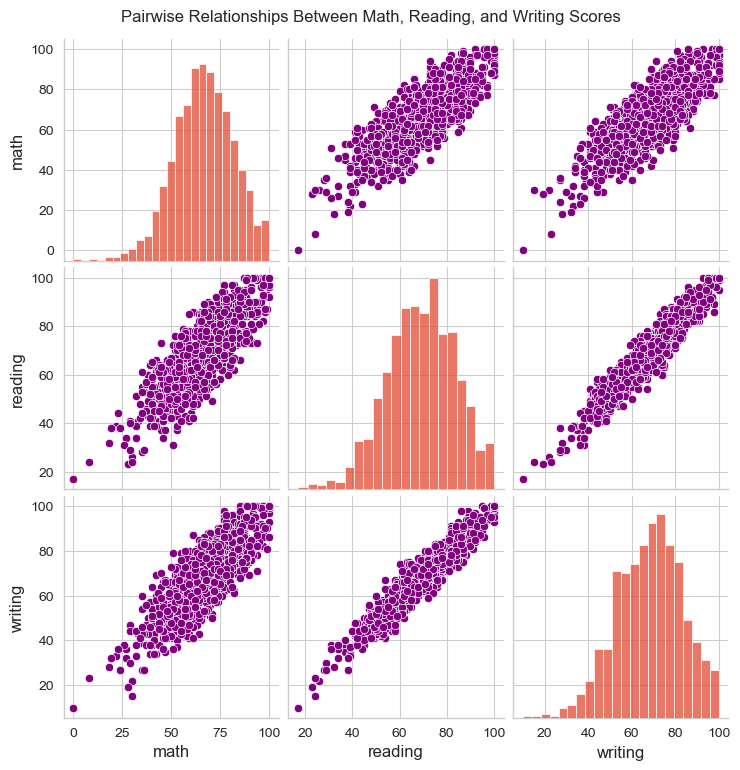

In [34]:
sns.pairplot(df[['math', 'reading', 'writing']], plot_kws={'color': 'purple'})
plt.suptitle('Pairwise Relationships Between Math, Reading, and Writing Scores', y=1.02)
plt.show()

Reading and writing scores exhibit a very strong positive correlation (r ≈ 0.95), indicating that students who perform well in reading tend to demonstrate similarly strong writing abilities. This suggests the presence of transferable language skills.

#### Correlation Analysis

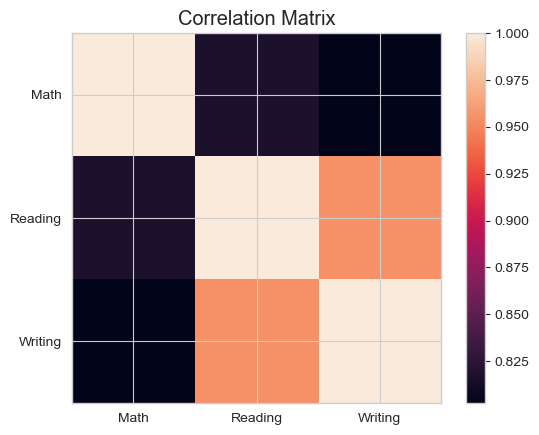

In [42]:
corr = df[['math', 'reading', 'writing']].corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(3), ['Math', 'Reading', 'Writing'])
plt.yticks(range(3), ['Math', 'Reading', 'Writing'])
plt.title('Correlation Matrix')

plt.savefig('images/correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

📝 Observation:

  - Strong positive correlation between Reading and Writing

  - Moderate correlation between Math and Reading/Writing

  - All subjects positively related

🧠 Inference:

  - Language skills are strongly interconnected

  - Improvement in one subject may relate to others

  - Academic abilities show dependency patterns

## Key Insights
   - Test preparation significantly improves scores.

   - Math is the lowest scoring subject.

   -  Male performed better on maths, female performed better in reading and writing.

   - Math, Reading, and Writing scores are strongly positively correlated.

   - Group E consistently performs better across all subjects.

   - Reading & writing are highly correlated (0.95)

   - Students with educated parents tend to perform better.

   - Students with better resources (standard lunch and test preparation) outperform others.